
Introduction
I have used numpy and pandas libray for the data analsyis required.
I have used the pandas.read_csv method for importing the supermarket.csv file.  
To parse the dates, I have used the parse_dates parameter of the read_csv method as half of the values are in a different format.
I have then converted it into the standard format.
To make a unique key identifier of each basket, I have joined the columns 'Date','Time' and 'Basket' to make a new column 'BasketID'.
I have also appended a '-' before the time to split the date from the unique id
Following is the processed dataframe:

   Department   Product  Checkout        Date      Time  Basket  Total  \
0  CIGARETTES  b1093174        17  07/29/2005  -7:02:18  101790  17.34   
1   GROCERIES  f9d831cb        85  07/29/2005  -7:04:40  103601   8.89   
2   GROCERIES  8a9ba2b0        85  07/29/2005  -7:04:40  103601   8.58   
3   GROCERIES  2af8f6f1        13  07/29/2005  -7:05:07  101422  11.95   
4   GROCERIES  84a0e024        13

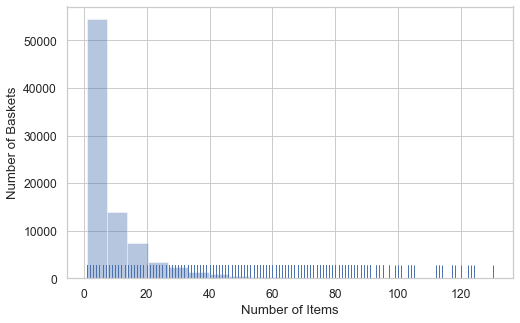



Q2
The following scatter plot shows us the the relation between each individual basket and dollar value of the basket. 
The table below the plot lists how much money does store get from each size of the basket.



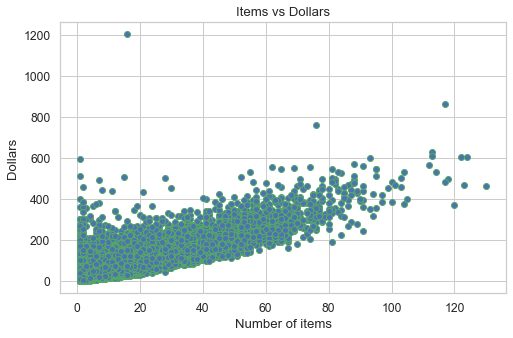

Items 			 Dollars
1			295439.0699999983
2			142514.75999999992
4			118778.3699999998
6			118538.06000000013
14			85830.70000000004
7			117782.57000000002
15			85498.97000000007
11			100947.86000000006
5			118739.30999999992
3			121125.14999999995
8			118054.73999999998
9			112418.32000000004
20			66932.83000000007
12			103288.19999999997
13			90937.55000000008
23			59996.10000000004
10			104064.85999999988
25			57299.609999999964
47			19409.460000000003
39			31583.08999999999
16			81653.81000000006
30			44025.15
26			51141.07999999999
46			20970.7
24			55738.21000000001
33			39765.94000000001
28			49224.090000000004
35			36926.74000000002
19			63309.13999999993
18			74708.83000000003
17			81533.93999999999
37			31417.4
31			41673.78999999999
43			24639.190000000017
29			45284.620000000046
40			30055.57
21			65185.62000000005
27			46598.29000000001
32			40717.51000000003
34			36187.70999999999
44			22457.46
22			64528.37000000001
72			2626.7
68			3331.7000000000007
70			4607.78000000000

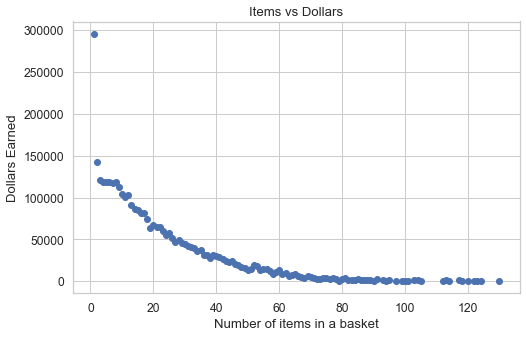



Q3.A.
The follwing table shows the number of baskets on each day of the week.
The bar graph visualizes the above relationship.
We can clearly see through the chart, that SATURDAY is the busiest day of the week. 

Days 		 Baskets
Monday		92958
Tuesday		82781
Wednesday		84989
Thursday		90059
Friday		117508
Saturday		152143
Sunday		108976


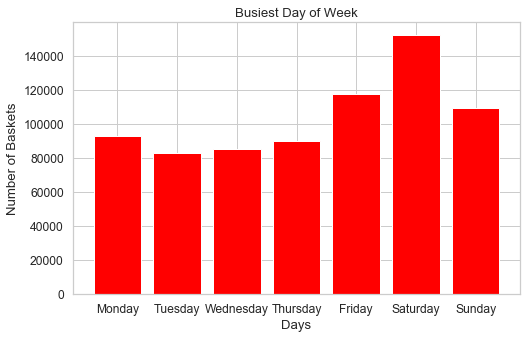



Q3. B.
The follwing table shows the dollars earned on each day of the week.
The bar graph visualizes the above relationship.
We can clearly see through the chart, that SATURDAY is the most profitbale day of the week, as it is also the busiest day


Days 		 Dollars Earned
Monday		453638.9499999978
Tuesday		408892.82999999775
Wednesday		422615.32999999955
Thursday		445432.4699999968
Friday		569732.1599999949
Saturday		740161.5899999918
Sunday		535640.9799999971


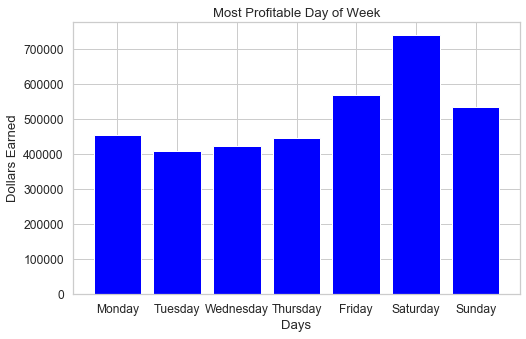


Summary 

Through the data analysis of the supermarket transactions dataset, we can hence conclude that the population
mostly buys less number of items in one trip. They prefer to spend less rather than buying a lot of items.
Hence, the light basket customers are more important. The supermarket can install more express counters 
for less number of items to increase the sales.
We can also conclude that Friday and Saturday are the most busiest and the most profitable days of the week.
The supermarket should ensure that enough staff is available on these days to assist the customers.




In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the dataset
df = pd.read_csv("supermarket.csv",parse_dates= ['Date'])

#Converting Date column to standard format
df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')

#Creating a unique key identifier for baskets
df['Time'] ='-' + df['Time'].astype(str)
df["BasketID"] = df["Date"].astype(str) + df["Time"].astype(str) + df["Basket"].astype(str)

Introduction = """
Introduction
I have used numpy and pandas libray for the data analsyis required.
I have used the pandas.read_csv method for importing the supermarket.csv file.  
To parse the dates, I have used the parse_dates parameter of the read_csv method as half of the values are in a different format.
I have then converted it into the standard format.
To make a unique key identifier of each basket, I have joined the columns 'Date','Time' and 'Basket' to make a new column 'BasketID'.
I have also appended a '-' before the time to split the date from the unique id
Following is the processed dataframe:
"""

print(Introduction)
print(df.head(5))

dept = df.iloc[0:,0] 
product = df.iloc[0:,1]
checkout = df.iloc[0:,2]
date = df.iloc[0:,3]
time = df.iloc[0:,4]
basketid = df.iloc[0:,7]
total = df.iloc[0:,6]

#Couting unique number of baskets to plot histogram
unique,x = np.unique(basketid,return_counts = True) 

q1 = """

Q1.
The following histogram shows the distribution of basket sizes measured by the number of items in a basket.   
Here, we can see that the most popular basket sizes are baskets with 1-5 items in the basket.
"""
#Code for histogram plot
print(q1)
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
g = sns.distplot(x, bins=20, kde=False, rug=True,).set(xlabel='Number of Items', ylabel='Number of Baskets')
plt.show()


#Code to calculate dollars earned from every basket
from collections import defaultdict
size = defaultdict(int) 

for i in basketid:
    size[i] += 1 
    
dollars = defaultdict(int)

for i in range(len(basketid)):
    dollars[(basketid[i])] += total[i]
    
q2 = """

Q2
The following scatter plot shows us the the relation between each individual basket and dollar value of the basket. 
The table below the plot lists how much money does store get from each size of the basket.
"""

print(q2)
#Code to plot how dollars earned from every basket
plt.scatter(list(size.values()), list(dollars.values()), edgecolors='g')
plt.xlabel('Number of items')
plt.ylabel('Dollars')
plt.title('Items vs Dollars')
plt.show()

#Code to calculate dollars earned from each size of a basket
baskets = defaultdict(int) 
for i in size.keys():
    baskets[size[i]] += dollars[i]
    
#To print the table for each size of a basket
print('Items \t\t\t Dollars')
for n,g in zip(list(baskets.keys()),list(baskets.values())):
    print(n,g,sep='\t\t\t')
    

#Code to plot the above table    
print("The second scatter plot shows us money from each size of the basket. We can infer from this plot that light (small baskets) customers are more important as they generate more revenue.")    
plt.scatter(list(baskets.keys()), list(baskets.values()))
plt.xlabel('Number of items in a basket')
plt.ylabel('Dollars Earned')
plt.title('Items vs Dollars')
plt.show()

dates = list(size.keys())

#Code to extract dates from unique baskets
for i in range(len(dates)):
    dates[i] = dates[i].split("-")[0]

#Code to covery DATES into DAYS
import datetime  
from datetime import date 
import calendar 
  
def findDay(date): 
    month, day, year = (int(i) for i in date.split('/'))     
    born = datetime.date(year, month, day) 
    return born.strftime("%A") 

days = []
for i in dates:
    days.append(findDay(i))

#Code for calculating number of trips on each day    
monday=0
tuesday=0
wednesday=0
thursday=0
friday=0
saturday=0
sunday=0

for i in size.keys():
    k = i.split("-")[0]
    today = findDay(k)
    if today=="Monday":
        monday += size[i]
    elif today=="Tuesday":
        tuesday += size[i]
    elif today=="Wednesday":
        wednesday += size[i]
    elif today=="Thursday":
        thursday += size[i]
    elif today=="Friday":
        friday += size[i]
    elif today=="Saturday":
        saturday += size[i]
    elif today=="Sunday":
        sunday += size[i]
        
q3a = """

Q3.A.
The follwing table shows the number of baskets on each day of the week.
The bar graph visualizes the above relationship.
We can clearly see through the chart, that SATURDAY is the busiest day of the week. 
"""

#Code to plot number of trips on each day
shoppingTrips=[monday,tuesday,wednesday,thursday,friday,saturday,sunday]
weekdays=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

print(q3a)
print('Days \t\t Baskets')
for n,g in zip(weekdays,shoppingTrips):
    print(n,g,sep='\t\t')
    
plt.bar(weekdays,shoppingTrips,color = "red")
plt.xlabel("Days")
plt.ylabel("Number of Baskets")
plt.title("Busiest Day of Week")
plt.show()


#Code to calculate dollars earned from trips on each day
dmonday=0
dtuesday=0
dwednesday=0
dthursday=0
dfriday=0
dsaturday=0
dsunday=0

for i in dollars.keys():
    k = i.split("-")[0]
    today = findDay(k)
    if today=="Monday":
        dmonday += dollars[i]
    elif today=="Tuesday":
        dtuesday += dollars[i]
    elif today=="Wednesday":
        dwednesday += dollars[i]
    elif today=="Thursday":
        dthursday += dollars[i]
    elif today=="Friday":
        dfriday += dollars[i]
    elif today=="Saturday":
        dsaturday += dollars[i]
    elif today=="Sunday":
        dsunday += dollars[i]
        
profit=[dmonday,dtuesday,dwednesday,dthursday,dfriday,dsaturday,dsunday]

q3b = """

Q3. B.
The follwing table shows the dollars earned on each day of the week.
The bar graph visualizes the above relationship.
We can clearly see through the chart, that SATURDAY is the most profitbale day of the week, as it is also the busiest day

"""
#Code to make table of dollars earned from trips on each day
print(q3b)
print('Days \t\t Dollars Earned')
for n,g in zip(weekdays,profit):
    print(n,g,sep='\t\t')

#Code to plot dollars earned from trips on each day
plt.bar(weekdays,profit,color = "blue")
plt.xlabel("Days")
plt.ylabel("Dollars Earned")
plt.title("Most Profitable Day of Week")
plt.show()

summary="""
Summary 

Through the data analysis of the supermarket transactions dataset, we can hence conclude that the population
mostly buys less number of items in one trip. They prefer to spend less rather than buying a lot of items.
Hence, the light basket customers are more important. The supermarket can install more express counters 
for less number of items to increase the sales.
We can also conclude that Friday and Saturday are the most busiest and the most profitable days of the week.
The supermarket should ensure that enough staff is available on these days to assist the customers.

"""

print(summary)